## 군집분석
- 군집분석은 종속 변수에 대한 독립변수의 영향과 같이 사전에 정의된 특수한 목적이 없음
- 데이터 자체에 의존해서 데이터 구조와 자료를 탐색하고 요약하는 기법
- 대용량 데이터의 경우 전체에 대한 의미 있는 정보를 얻어낼 수 있으며 전체를 유사한 군집으로 구분한다면 전체에 대한 의미 있는 정보를 얻을 수 있음
- 동일한 군집 내 개체들은 유사한 성격을 가짐. 즉, 서로 다른 군집은 이질적인 성격을 갖도록 군집을 형성
- 군집 간의 유사도를 평가하기 위하여 유클리드 거리, 마할라노비스 거리, 해밍 거리 등의 측정 함수를 사용
- 대상을 어떻게 분석할 지에 따라 계층적 군집 분석과 비계층적 군집분석으로 구분한다.

#### 분류
- 계층적 군집분석은 개별 대상 간의 거리에 의하여 가장 가까이 있는 대상들로부터 시작하여 결합해 감으로써 나무 모양의 계층구조를 형성해 가는 방법
- 비 계층적 군집분석은 군집의 수가 한 개 씩 감소하는 것이 아니라 사전에 정해진 군집의 숫자에 따라 대상들이 할당됨. 많은 데이터를 빠르고 쉽게 분류할 수 있어야 하나 군집 형성을 위한 초기값에 따라 군집 결과가 달라질 수 있음.

- 비 계층적 군집 분석의 특징
    
    - 계층 적 군집분석보다 속도 빠름
    - 군집의 수를 알고 있는 경우 이용
    - k는 미리 정하는 군집 수
    - 확인적 군집분석
    - 계층적 군집화의 결과에 의거한 군집 수 결정
    - 변수보다 관측댁상 군집화에 많이 이용
    - 군집의 중심(Cluster Center)은 사용자가 정함

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
iris = load_iris()
df_iris = pd.DataFrame(data=iris.data,columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
kmeans = KMeans(n_clusters=3, max_iter=300,random_state=0).fit(df_iris)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [10]:
df_iris['cluster'] = kmeans.labels_
df_iris['target'] = iris.target
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target
0,5.1,3.5,1.4,0.2,1,0
1,4.9,3.0,1.4,0.2,1,0
2,4.7,3.2,1.3,0.2,1,0
3,4.6,3.1,1.5,0.2,1,0
4,5.0,3.6,1.4,0.2,1,0


In [16]:
iris_result = df_iris.groupby(['target','cluster'])['sepal length (cm)'].count()
iris_result

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler

In [19]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_tf = pca.fit_transform(iris.data)
df_iris['pca_x'] = pca_tf[:,0]
df_iris['pca_y'] = pca_tf[:,1]
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster,target,pca_x,pca_y
0,5.1,3.5,1.4,0.2,1,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,1,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,1,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,1,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,1,0,-2.728717,0.326755


Text(0.5, 1.0, '3 Clusters visulization by 2 PCA Components')

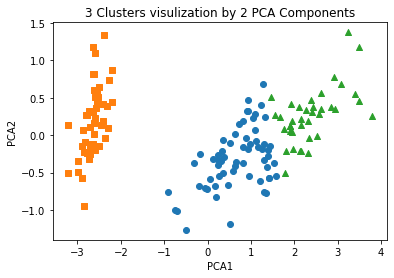

In [21]:
mark0_ind = df_iris[df_iris.cluster==0].index
mark1_ind = df_iris[df_iris.cluster==1].index
mark2_ind = df_iris[df_iris.cluster==2].index

plt.scatter(x=df_iris.loc[mark0_ind,'pca_x'],y=df_iris.loc[mark0_ind,'pca_y'],marker='o')
plt.scatter(x=df_iris.loc[mark1_ind,'pca_x'],y=df_iris.loc[mark1_ind,'pca_y'],marker='s')
plt.scatter(x=df_iris.loc[mark2_ind,'pca_x'],y=df_iris.loc[mark2_ind,'pca_y'],marker='^')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('3 Clusters visulization by 2 PCA Components')

# 군집평가
- 실루엣 분석으로 평가. 이를 위해 metrics 모듈의 silhouette_samples,silhouette_scre을 이용한다.
- 대부분의 군집화 데이터 세트는 타겟 레이블을 가지고 있지 않다.
- 비지도 하습의 특성상 정확하게 성능을 평가하지 어렵지만 군집화의 성능을 평가하는 방법으로 실루엣 분석 이용
- 효율적으로 잘 분리했다는 것은 다른 군집과의 거리는 떨어져 있고, 동일 군집끼리의 데이터는 서로 가깝게 잘 뭉쳐있다는 의이미이다.
- 실루엣 게수 ; S(i) = b(I(/max(a(i),b(i))))
        
        - a(i) : 해당 데이터 포인트와 같은 군집 내에 있는 다른 데이터 ㅍ인트와의 거리를 평균한 값
        - b(i) : 해당 데이터 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 평균거리
        -=